In [8]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import os

In [194]:
def sort_age_group(df):
    age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
    df['Age_cat'] = pd.Categorical(df['Age_cat'], categories=age_categories_order, ordered=True)
    sorted_age1 = df.sort_values(by='Age_cat')
    return sorted_age1


In [69]:
folder_path = './df'
file_list = os.listdir(folder_path)

df = pd.DataFrame()

for file_name in file_list:
    file_path = folder_path + '/' + file_name
    print(file_name)
    
    df2 = pd.read_csv(file_path)  
    df = pd.concat([df, df2], ignore_index=True, axis=0)

nyt1.csv
nyt10.csv
nyt11.csv
nyt12.csv
nyt13.csv
nyt14.csv
nyt15.csv
nyt16.csv
nyt17.csv
nyt18.csv
nyt19.csv
nyt2.csv
nyt20.csv
nyt21.csv
nyt22.csv
nyt23.csv
nyt24.csv
nyt25.csv
nyt26.csv
nyt27.csv
nyt28.csv
nyt29.csv
nyt3.csv
nyt30.csv
nyt31.csv
nyt4.csv
nyt5.csv
nyt6.csv
nyt7.csv
nyt8.csv
nyt9.csv


In [88]:
df

,Age,Gender,Impressions,Clicks,Signed_In,Age_cat,Gender_name,CTR
0,36,0,3,0,1,35–44,Female,0.0
1,73,1,3,0,1,65+,Male,0.0
2,30,0,3,0,1,25–34,Female,0.0
3,49,1,3,0,1,45–54,Male,0.0
4,47,1,11,0,1,45–54,Male,0.0
...,...,...,...,...,...,...,...,...
14905860,0,0,6,0,0,<18,Female,0.0
14905861,0,0,1,0,0,<18,Female,0.0
14905862,63,1,0,0,1,55–64,Male,-999.0
14905863,50,0,16,0,1,45–54,Female,0.0


In [87]:
bins = [-float('inf'), 18, 25, 35, 45, 55, 65, float('inf')]
agg_y = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']

df.loc[df['Age'] <18, 'Age_cat'] = '<18'
df.loc[(df['Age'] >=18) & (df['Age'] <=24), 'Age_cat'] = '18–24'
df.loc[(df['Age'] >=25) & (df['Age'] <=34), 'Age_cat'] = '25–34'
df.loc[(df['Age'] >=35) & (df['Age'] <=44), 'Age_cat'] = '35–44'
df.loc[(df['Age'] >=45) & (df['Age'] <=54), 'Age_cat'] = '45–54'
df.loc[(df['Age'] >=55) & (df['Age'] <=64), 'Age_cat'] = '55–64'
df.loc[df['Age'] >=65, 'Age_cat'] = '65+'

df.loc[df['Gender'] == 0, 'Gender_name'] = 'Female'
df.loc[df['Gender'] == 1, 'Gender_name'] = 'Male'

df['CTR']= df['Clicks'] / df['Impressions']
df['CTR'].fillna(-999.0, inplace=True)


In [89]:
df.dtypes

Age              int64
Gender           int64
Impressions      int64
Clicks           int64
Signed_In        int64
Age_cat         object
Gender_name     object
CTR            float64
dtype: object

In [91]:
df.head(50)

,Age,Gender,Impressions,Clicks,Signed_In,Age_cat,Gender_name,CTR
0,36,0,3,0,1,35–44,Female,0.000000
1,73,1,3,0,1,65+,Male,0.000000
2,30,0,3,0,1,25–34,Female,0.000000
3,49,1,3,0,1,45–54,Male,0.000000
4,47,1,11,0,1,45–54,Male,0.000000
5,47,0,11,1,1,45–54,Female,0.090909
6,0,0,7,1,0,<18,Female,0.142857
7,46,0,5,0,1,45–54,Female,0.000000
8,16,0,3,0,1,<18,Female,0.000000
9,52,0,4,0,1,45–54,Female,0.000000


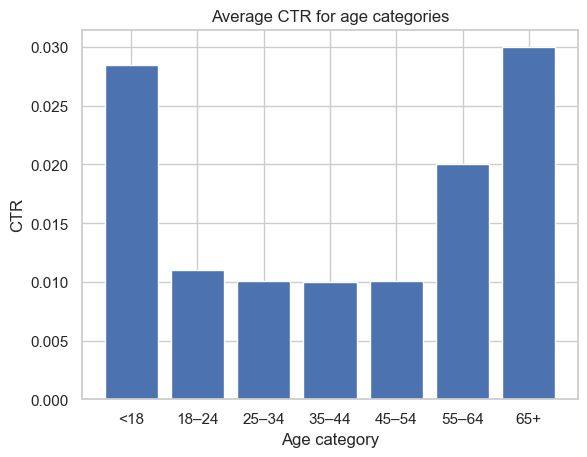

In [139]:
filtered_data1 = df[df['CTR'] != -999].groupby('Age_cat')['CTR'].mean().reset_index()

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
filtered_data1['Age_cat'] = pd.Categorical(filtered_data1['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = filtered_data1.sort_values(by='Age_cat')
sorted_age1

sns.set_style("whitegrid")
plt.bar(sorted_age1['Age_cat'], sorted_age1['CTR'])
plt.xlabel('Age category')
plt.ylabel('CTR')
plt.title('Average CTR for age categories')
plt.show()

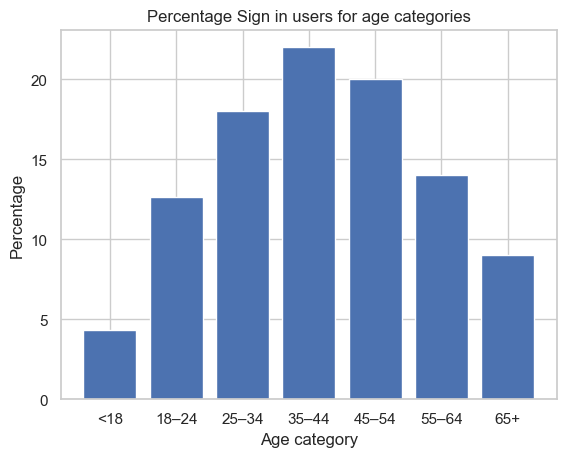

In [162]:
filtered_data1 = df.groupby('Age_cat')['Signed_In'].sum().reset_index()

all_val_num = filtered_data1['Signed_In'].sum()
filtered_data2 = filtered_data1
filtered_data2['Signed_In'] = (filtered_data1['Signed_In'] / all_val_num * 100)

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
filtered_data2['Age_cat'] = pd.Categorical(filtered_data2['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = filtered_data1.sort_values(by='Age_cat')

sns.set_style("whitegrid")
plt.bar(sorted_age1['Age_cat'], sorted_age1['Signed_In'])
plt.xlabel('Age category')
plt.ylabel('Percentage')
plt.title('Percentage Sign in users for age categories')
plt.show()


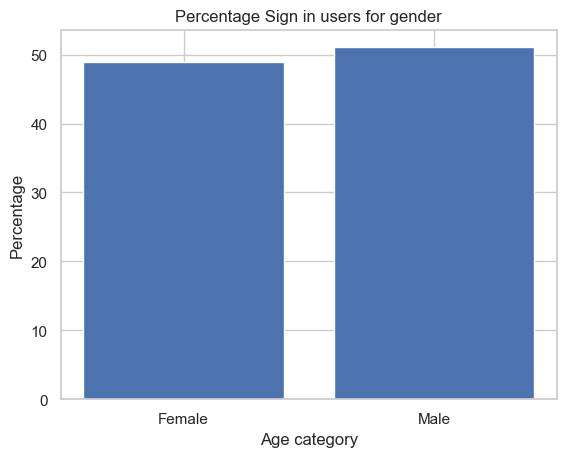

In [164]:
filtered_data1 = df[df['Age'] >= 18].groupby('Gender_name')['Signed_In'].sum().reset_index()

all_val_num = filtered_data1['Signed_In'].sum()
filtered_data2 = filtered_data1
filtered_data2['Signed_In'] = (filtered_data1['Signed_In'] / all_val_num * 100)

sns.set_style("whitegrid")
plt.bar(filtered_data2['Gender_name'], filtered_data2['Signed_In'])
plt.xlabel('Age category')
plt.ylabel('Percentage')
plt.title('Percentage Sign in users for gender')
plt.show()


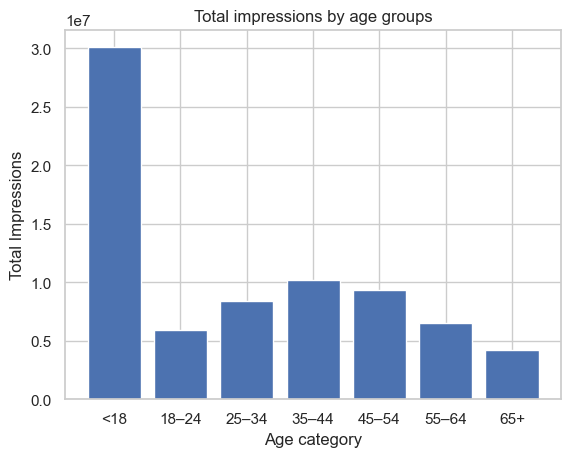

In [169]:
filtered_data1 = df.groupby('Age_cat')['Impressions'].sum().reset_index()
filtered_data1

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
filtered_data1['Age_cat'] = pd.Categorical(filtered_data1['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = filtered_data1.sort_values(by='Age_cat')

sns.set_style("whitegrid")
plt.bar(sorted_age1['Age_cat'], sorted_age1['Impressions'])
plt.xlabel('Age category')
plt.ylabel('Total Impressions')
plt.title('Total impressions by age groups')
plt.show()


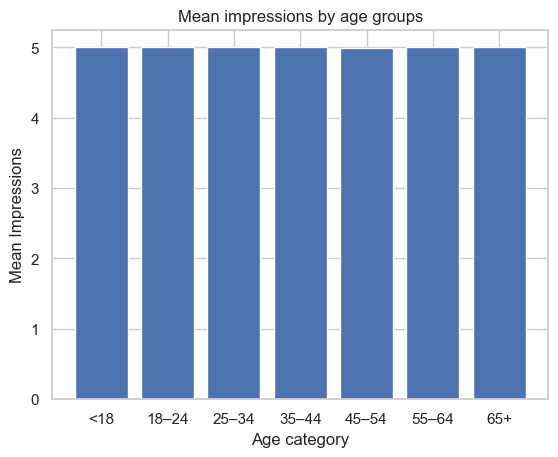

In [171]:
filtered_data1 = df.groupby('Age_cat')['Impressions'].mean().reset_index()
filtered_data1

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
filtered_data1['Age_cat'] = pd.Categorical(filtered_data1['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = filtered_data1.sort_values(by='Age_cat')

sns.set_style("whitegrid")
plt.bar(sorted_age1['Age_cat'], sorted_age1['Impressions'])
plt.xlabel('Age category')
plt.ylabel('Mean Impressions')
plt.title('Mean impressions by age groups')
plt.show()

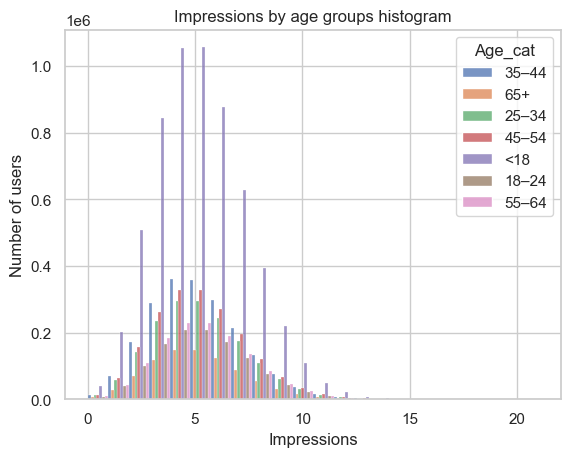

In [178]:
fig, ax = plt.subplots()
sns.histplot(
    data=df, x='Impressions', hue='Age_cat', multiple='dodge', bins = 22).set(title="Impressions by age groups histogram", ylabel = 'Number of users')
plt.show()

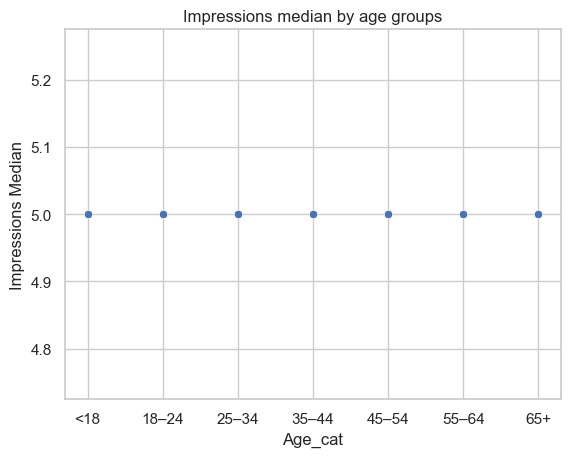

In [187]:
dfImpressionsMedian = df.groupby('Age_cat')['Impressions'].median().reset_index(name = 'Impressions Median')

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
dfImpressionsMedian['Age_cat'] = pd.Categorical(dfImpressionsMedian['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = dfImpressionsMedian.sort_values(by='Age_cat')

plotImpressionsMedian =  sns.scatterplot(x='Age_cat', y= 'Impressions Median', data=sorted_age1)
plotImpressionsMedian.set(title = 'Impressions median by age groups')
plt.show()

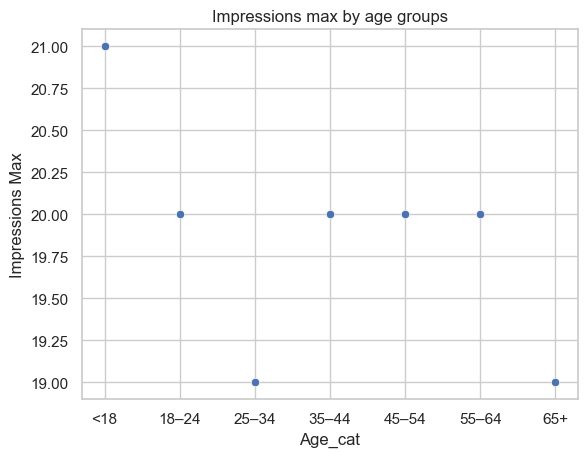

In [188]:
dImpressionsMax = df.groupby('Age_cat')['Impressions'].max().reset_index(name = 'Impressions Max')

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
dImpressionsMax['Age_cat'] = pd.Categorical(dImpressionsMax['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = dImpressionsMax.sort_values(by='Age_cat')


plotImpressionsMax =  sns.scatterplot(x='Age_cat', y= 'Impressions Max', data=sorted_age1)
plotImpressionsMax.set(title = 'Impressions max by age groups')
plt.show()

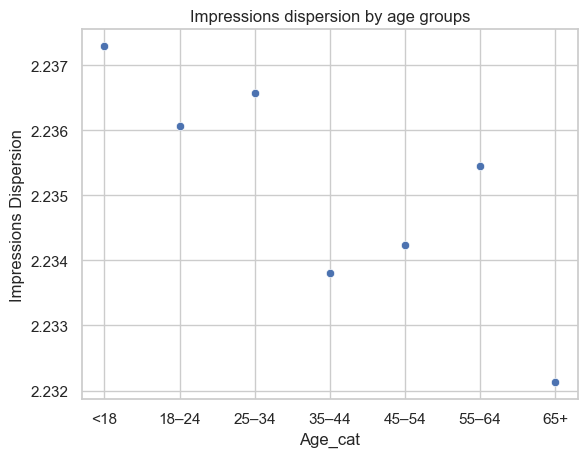

In [191]:
dfImpressionsDispersion = df.groupby('Age_cat')['Impressions'].std().reset_index(name = 'Impressions Dispersion')

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
dfImpressionsDispersion['Age_cat'] = pd.Categorical(dfImpressionsDispersion['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = dfImpressionsDispersion.sort_values(by='Age_cat')

plotImpressionsDispersion =  sns.scatterplot(x='Age_cat', y= 'Impressions Dispersion', data=sorted_age1)
plotImpressionsDispersion.set(title = 'Impressions dispersion by age groups')
plt.show()

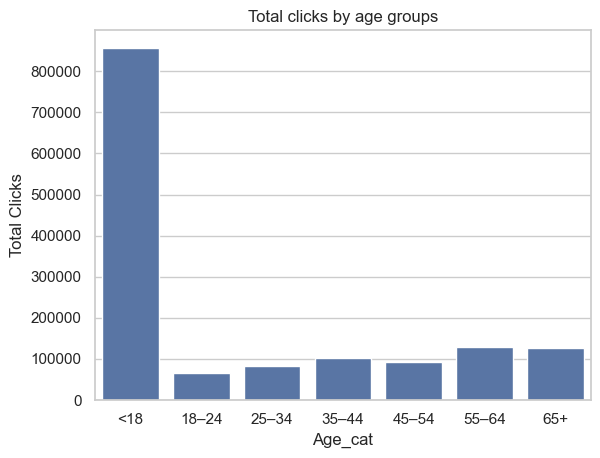

In [193]:
dfClicksSum = df.groupby('Age_cat')['Clicks'].sum().reset_index(name = 'Total Clicks')

age_categories_order = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
dfClicksSum['Age_cat'] = pd.Categorical(dfClicksSum['Age_cat'], categories=age_categories_order, ordered=True)
sorted_age1 = dfClicksSum.sort_values(by='Age_cat')


plotClicksSum =  sns.barplot(x='Age_cat', y= 'Total Clicks', data=sorted_age1)
plotClicksSum.set(title = 'Total clicks by age groups')
plt.show()

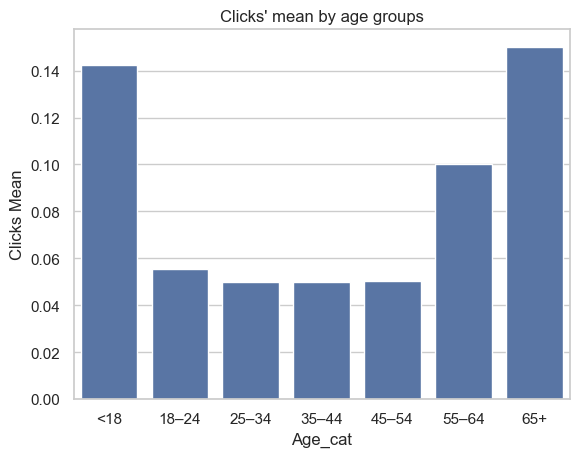

In [196]:
dfClicksMean = df.groupby('Age_cat')['Clicks'].mean().reset_index(name = 'Clicks Mean')

plotClicksMean =  sns.barplot(x='Age_cat', y= 'Clicks Mean', data=sort_age_group(dfClicksMean))
plotClicksMean.set(title = 'Clicks\' mean by age groups')
plt.show()

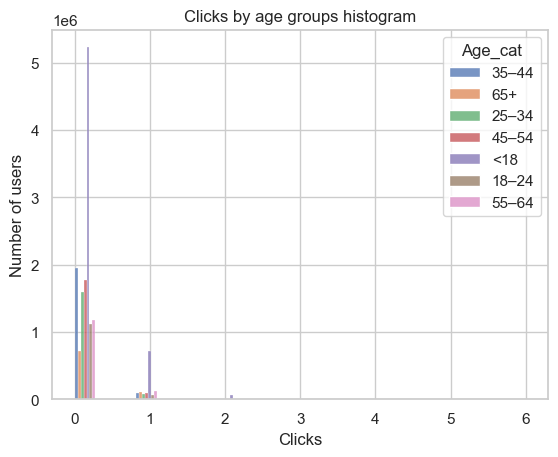

In [198]:
fig, ax = plt.subplots()
sns.histplot(
    data=df, x='Clicks', hue='Age_cat', multiple='dodge', bins = 22).set(title="Clicks by age groups histogram", ylabel = 'Number of users')
plt.show()

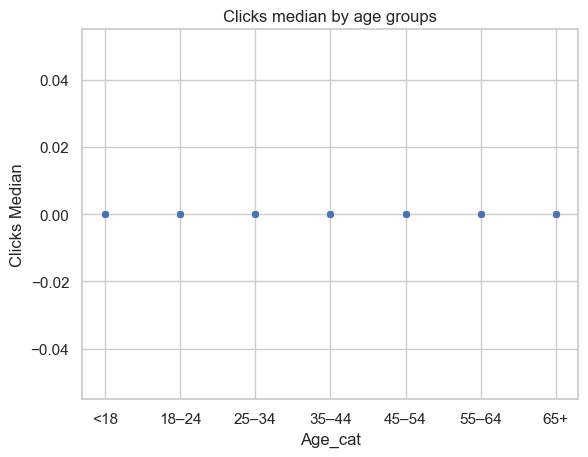

In [200]:
dfClicksMedian = df.groupby('Age_cat')['Clicks'].median().reset_index(name = 'Clicks Median')
plotClicksMedian =  sns.scatterplot(x='Age_cat', y= 'Clicks Median', data=sort_age_group(dfClicksMedian))
plotClicksMedian.set(title = 'Clicks median by age groups')
plt.show()

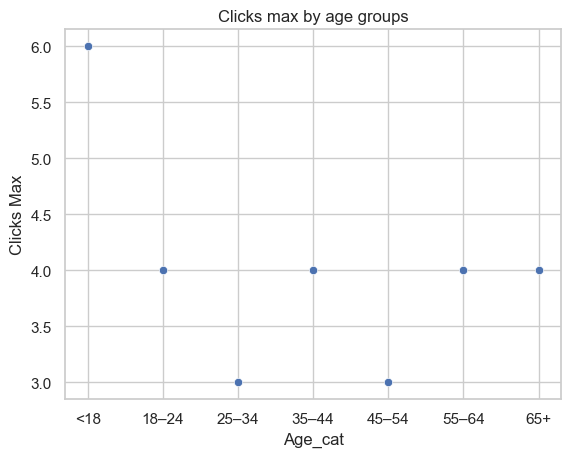

In [202]:
dfClicksMax = df.groupby('Age_cat')['Clicks'].max().reset_index(name = 'Clicks Max')
plotClicksMax =  sns.scatterplot(x='Age_cat', y= 'Clicks Max', data=sort_age_group(dfClicksMax))
plotClicksMax.set(title = 'Clicks max by age groups')
plt.show()

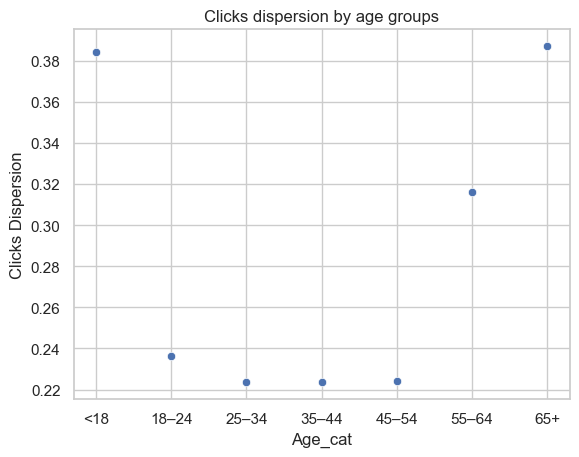

In [203]:
dfClicksDispersion = df.groupby('Age_cat')['Clicks'].std().reset_index(name = 'Clicks Dispersion')
plotClicksDispersion =  sns.scatterplot(x='Age_cat', y= 'Clicks Dispersion', data=sort_age_group(dfClicksDispersion))
plotClicksDispersion.set(title = 'Clicks dispersion by age groups')
plt.show()